## Bird Eye View in Tensorflow

based on [this blog post](http://kindoblue.nl/neural-network/tensorflow-homography)



In [1]:
import tensorflow as tf
import numpy as np
import cv2
%pylab inline

C:\Users\vl.ostankovich\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
def homography(x1s, x2s):
    
    def ax(p, q):   
        return [ p[0], p[1], -1, 0, 0, 0, -p[0] * q[0], -p[1] * q[0] ]

    def ay(p, q):
        return [ 0, 0, 0, p[0], p[1], 1, -p[0] * q[1], -p[1] * q[1] ]

    p = []
    
    # we build matrix A by using only 4 point correspondence. The linear
    # system is solved with the least square method, so here 
    # we could even pass more correspondence 
    p.append(ax(x1s[0], x2s[0]))
    p.append(ay(x1s[0], x2s[0]))

    p.append(ax(x1s[1], x2s[1]))
    p.append(ay(x1s[1], x2s[1]))   
    
    p.append(ax(x1s[2], x2s[2]))
    p.append(ay(x1s[2], x2s[2]))
   
    p.append(ax(x1s[3], x2s[3]))
    p.append(ay(x1s[3], x2s[3]))
    
    # A is 8x8
    A = tf.stack(p, axis=0)  
    
    m = [[x2s[0][0], x2s[0][1], x2s[1][0], x2s[1][1], x2s[2][0], x2s[2][1], x2s[3][0], x2s[3][1]]]

    # P is 8x1
    P = tf.transpose(tf.stack(m, axis=0))  
      
    # here we solve the linear system
    # we transpose the result for convenience
    return tf.transpose(tf.matrix_solve_ls(A, P, fast=True))

In [3]:
IMAGE_H = 720//2
IMAGE_W = 1280

In [4]:
# read the jpeg
im = cv2.imread('./test_img.jpg')
im = im[...,::-1]
# decode the jpeg
imgt = tf.convert_to_tensor(im)

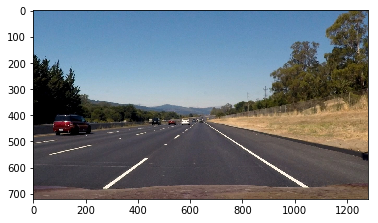

In [5]:
imshow(im)

In [6]:
imgt = imgt[450:(450+IMAGE_H), 0:IMAGE_W]
im = im[450:(450+IMAGE_H), 0:IMAGE_W]

In [7]:
sess = tf.InteractiveSession()

In [8]:
src = tf.constant([[0, 0], [IMAGE_W, 0], [0, IMAGE_H], [IMAGE_W, IMAGE_H]], dtype=tf.float32)
dst = tf.constant([ [0, 0], [IMAGE_W, 0] , [569, IMAGE_H], [711, IMAGE_H],], dtype=tf.float32)
# calculate homography
h = homography(dst,src)
# apply the homography and return the image
T = tf.contrib.image.transform(imgt, h, interpolation="BILINEAR")
wraped_img = T.eval()

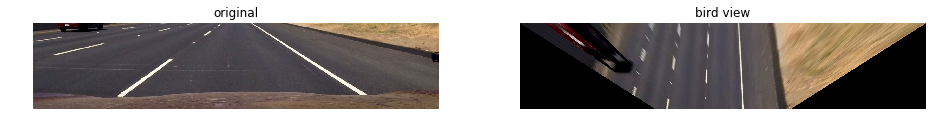

In [9]:
# create the plot
fig, axs = plt.subplots(1,2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('original')
axs[0].imshow(im)

axs[1].axis('off')
axs[1].set_title('bird view')
axs[1].imshow(wraped_img)